In [39]:
import pickle
import random
import warnings
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from IPython.core.display import display, HTML
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, plot_confusion_matrix, plot_precision_recall_curve, plot_roc_curve, roc_auc_score
warnings.filterwarnings('ignore')
pd.pandas.set_option('display.max_rows', None)
pd.pandas.set_option('display.max_columns', None)
display(HTML('<style>.container{width : 100% ! important;}</style>'))
print('Libraries imported successfully!!')

Libraries imported successfully!!


In [2]:
df_train = pd.read_csv('Train.csv')
df_test = pd.read_csv('Test.csv')

In [3]:
df_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,AMT_CREDIT_x,REGION_POPULATION_RELATIVE,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,WEEKDAY_APPR_PROCESS_START_x,HOUR_APPR_PROCESS_START_x,REG_REGION_NOT_LIVE_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Widow,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Maternity leave,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Unemployed,NAME_INCOME_TYPE_Working,NAME_TYPE_SUITE_Family,NAME_TYPE_SUITE_Group of people,NAME_TYPE_SUITE_Other_A,NAME_TYPE_SUITE_Other_B,"NAME_TYPE_SUITE_Spouse, partner",NAME_TYPE_SUITE_Unaccompanied,ORGANIZATION_TYPE_Agriculture,ORGANIZATION_TYPE_Bank,ORGANIZATION_TYPE_Business Entity Type 1,ORGANIZATION_TYPE_Business Entity Type 2,ORGANIZATION_TYPE_Business Entity Type 3,ORGANIZATION_TYPE_Cleaning,ORGANIZATION_TYPE_Construction,ORGANIZATION_TYPE_Culture,ORGANIZATION_TYPE_Electricity,ORGANIZATION_TYPE_Emergency,ORGANIZATION_TYPE_Government,ORGANIZATION_TYPE_Hotel,ORGANIZATION_TYPE_Housing,ORGANIZATION_TYPE_Industry: type 1,ORGANIZATION_TYPE_Industry: type 10,ORGANIZATION_TYPE_Industry: type 11,ORGANIZATION_TYPE_Industry: type 12,ORGANIZATION_TYPE_Industry: type 13,ORGANIZATION_TYPE_Industry: type 2,ORGANIZATION_TYPE_Industry: type 3,ORGANIZATION_TYPE_Industry: type 4,ORGANIZATION_TYPE_Industry: type 5,ORGANIZATION_TYPE_Industry: type 6,ORGANIZATION_TYPE_Industry: type 7,ORGANIZATION_TYPE_Industry: type 8,ORGANIZATION_TYPE_Industry: type 9,ORGANIZATION_TYPE_Insurance,ORGANIZATION_TYPE_Kindergarten,ORGANIZATION_TYPE_Legal Services,ORGANIZATION_TYPE_Medicine,ORGANIZATION_TYPE_Military,ORGANIZATION_TYPE_Mobile,ORGANIZATION_TYPE_Other,ORGANIZATION_TYPE_Police,ORGANIZATION_TYPE_Postal,ORGANIZATION_TYPE_Realtor,ORGANIZATION_TYPE_Religion,ORGANIZATION_TYPE_Restaurant,ORGANIZATION_TYPE_School,ORGANIZATION_TYPE_Security,ORGANIZATION_TYPE_Security Ministries,ORGANIZATION_TYPE_Self-employed,ORGANIZATION_TYPE_Services,ORGANIZATION_TYPE_Telecom,ORGANIZATION_TYPE_Trade: type 1,ORGANIZATION_TYPE_Trade: type 2,ORGANIZATION_TYPE_Trade: type 3,ORGANIZATION_TYPE_Trade: type 4,ORGANIZATION_TYPE_Trade: type 5,ORGANIZATION_TYPE_Trade: type 6,ORGANIZATION_TYPE_Trade: type 7,ORGANIZATION_TYPE_Transport: type 1,ORGANIZATION_TYPE_Transport: type 2,ORGANIZATION_TYPE_Transport: type 3,ORGANIZATION_TYPE_Transport: type 4,ORGANIZATION_TYPE_University,SK_ID_BUREAU,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_OVERDUE,DAYS_CREDIT_UPDATE,CREDIT_ACTIVE_Closed,CREDIT_ACTIVE_Sold,CREDIT_TYPE_Car loan,CREDIT_TYPE_Cash loan (non-earmarked),CREDIT_TYPE_Consumer credit,CREDIT_TYPE_Credit card,CREDIT_TYPE_Loan for business development,CREDIT_TYPE_Loan for working capital replenishment,CREDIT_TYPE_Microloan,CREDIT_T

In [4]:
X = df_train.drop(['SK_ID_BUREAU', 'SK_ID_CURR', 'SK_ID_PREV', 'SK_ID_PREV_x', 'SK_ID_PREV_y', 'TARGET'], axis = 1)
y = df_train['TARGET']

In [5]:
y.value_counts()

0    29704
1     7234
Name: TARGET, dtype: int64

In [6]:
ss = StandardScaler()
X_scaled = pd.DataFrame(ss.fit_transform(X), columns = X.columns)

In [7]:
X_scaled.head()

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,AMT_CREDIT_x,REGION_POPULATION_RELATIVE,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,WEEKDAY_APPR_PROCESS_START_x,HOUR_APPR_PROCESS_START_x,REG_REGION_NOT_LIVE_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Widow,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Maternity leave,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Unemployed,NAME_INCOME_TYPE_Working,NAME_TYPE_SUITE_Family,NAME_TYPE_SUITE_Group of people,NAME_TYPE_SUITE_Other_A,NAME_TYPE_SUITE_Other_B,"NAME_TYPE_SUITE_Spouse, partner",NAME_TYPE_SUITE_Unaccompanied,ORGANIZATION_TYPE_Agriculture,ORGANIZATION_TYPE_Bank,ORGANIZATION_TYPE_Business Entity Type 1,ORGANIZATION_TYPE_Business Entity Type 2,ORGANIZATION_TYPE_Business Entity Type 3,ORGANIZATION_TYPE_Cleaning,ORGANIZATION_TYPE_Construction,ORGANIZATION_TYPE_Culture,ORGANIZATION_TYPE_Electricity,ORGANIZATION_TYPE_Emergency,ORGANIZATION_TYPE_Government,ORGANIZATION_TYPE_Hotel,ORGANIZATION_TYPE_Housing,ORGANIZATION_TYPE_Industry: type 1,ORGANIZATION_TYPE_Industry: type 10,ORGANIZATION_TYPE_Industry: type 11,ORGANIZATION_TYPE_Industry: type 12,ORGANIZATION_TYPE_Industry: type 13,ORGANIZATION_TYPE_Industry: type 2,ORGANIZATION_TYPE_Industry: type 3,ORGANIZATION_TYPE_Industry: type 4,ORGANIZATION_TYPE_Industry: type 5,ORGANIZATION_TYPE_Industry: type 6,ORGANIZATION_TYPE_Industry: type 7,ORGANIZATION_TYPE_Industry: type 8,ORGANIZATION_TYPE_Industry: type 9,ORGANIZATION_TYPE_Insurance,ORGANIZATION_TYPE_Kindergarten,ORGANIZATION_TYPE_Legal Services,ORGANIZATION_TYPE_Medicine,ORGANIZATION_TYPE_Military,ORGANIZATION_TYPE_Mobile,ORGANIZATION_TYPE_Other,ORGANIZATION_TYPE_Police,ORGANIZATION_TYPE_Postal,ORGANIZATION_TYPE_Realtor,ORGANIZATION_TYPE_Religion,ORGANIZATION_TYPE_Restaurant,ORGANIZATION_TYPE_School,ORGANIZATION_TYPE_Security,ORGANIZATION_TYPE_Security Ministries,ORGANIZATION_TYPE_Self-employed,ORGANIZATION_TYPE_Services,ORGANIZATION_TYPE_Telecom,ORGANIZATION_TYPE_Trade: type 1,ORGANIZATION_TYPE_Trade: type 2,ORGANIZATION_TYPE_Trade: type 3,ORGANIZATION_TYPE_Trade: type 4,ORGANIZATION_TYPE_Trade: type 5,ORGANIZATION_TYPE_Trade: type 6,ORGANIZATION_TYPE_Trade: type 7,ORGANIZATION_TYPE_Transport: type 1,ORGANIZATION_TYPE_Transport: type 2,ORGANIZATION_TYPE_Transport: type 3,ORGANIZATION_TYPE_Transport: type 4,ORGANIZATION_TYPE_University,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_OVERDUE,DAYS_CREDIT_UPDATE,CREDIT_ACTIVE_Closed,CREDIT_ACTIVE_Sold,CREDIT_TYPE_Car loan,CREDIT_TYPE_Cash loan (non-earmarked),CREDIT_TYPE_Consumer credit,CREDIT_TYPE_Credit card,CREDIT_TYPE_Loan for business development,CREDIT_TYPE_Loan for working capital replenishment,CREDIT_TYPE_Microloan,CREDIT_TYPE_Mortgage,CREDIT_TYPE_Real e

In [8]:
pca_columns = []
for i in range(X_scaled.shape[1]):
    pca_columns.append('V' + str(i+1))
pca_model = PCA()
pca_model.fit(X_scaled)
X_pca_train = pd.DataFrame(pca_model.transform(X_scaled), columns = pca_columns)
explained_info_train = pd.DataFrame(pca_model.explained_variance_ratio_, columns = ['Explained Info']).sort_values(by = 'Explained Info', ascending = False)
imp = []
for i in range(explained_info_train.shape[0]):
    imp.append(explained_info_train.head(i).sum())
explained_info_train_sum = pd.DataFrame()
explained_info_train_sum['Variable'] = pca_columns
explained_info_train_sum['Importance'] = imp
explained_info_train_sum

,Variable,Importance
0,V1,Explained Info 0.0 dtype: float64
1,V2,Explained Info 0.035961 dtype: float64
2,V3,Explained Info 0.063407 dtype: float64
3,V4,Explained Info 0.088384 dtype: float64
4,V5,Explained Info 0.109661 dtype: float64
5,V6,Explained Info 0.129482 dtype: float64
6,V7,Explained Info 0.148804 dtype: float64
7,V8,Explained Info 0.166132 dtype: float64
8,V9,Explained Info 0.181671 dtype: float64
9,V10,Explained Info 0.196493 dtype: float64


In [9]:
pca_columns = []
for i in range(105):
    pca_columns.append('V' + str(i+1))
pca_model = PCA(n_components = 105)
pca_model.fit(X_scaled)
X_pca_train = pd.DataFrame(pca_model.transform(X_scaled), columns = pca_columns)

In [10]:
X_pca_train.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105
0,4.623441,-0.953532,3.168738,-0.136488,0.972108,-0.862008,0.508766,-0.651243,-0.002305,0.297570,0.613783,-0.181467,0.196743,0.139320,0.074587,0.807351,0.281455,0.053104,-0.501093,-0.014135,0.093975,0.207724,-0.272647,-0.145650,0.206839,-0.186197,0.216748,0.082547,-0.107028,-0.398693,0.646419,0.691295,0.490845,-1.010386,0.329181,0.356194,-0.995369,-0.338810,0.049346,0.698283,0.522773,0.470165,0.439279,-0.419274,-0.107602,-0.717586,-0.402139,-0.287872,-0.096799,0.208489,-0.194677,0.186831,-0.611984,-0.721254,-0.285283,-0.451229,-0.414877,0.614796,-0.319481,0.093711,0.161762,0.362228,0.367519,0.105282,-0.796367,0.136685,-0.139544,0.007330,-1.064037,0.201245,-0.120900,-0.036678,0.311354,0.334545,-0.634671,-0.425984,0.196293,0.326912,0.378707,-0.253432,0.210845,-0.204469,-0.273489,0.122710,-0.073869,-0.743080,0.197675,-0.539820,-0.256779,0.155890,0.151364,0.001008,-0.473437,-0.455636,0.127515,-0.121089,0.082429,0.159839,-0.647445,-0.496829,-0.263755,0.496755,-0.208429,-0.147550,-0.344495
1,4.615091,-0.984804,3.155376,-0.131795,0.993288,-0.815247,0.469450,-0.663404,-0.032708,0.276641,0.599823,-0.147442,0.236232,0.108631,0.081056,0.810408,0.360486,0.068427,-0.523539,0.011121,0.068701,0.253714,-0.222489,-0.088371,0.225348,-0.213929,0.152140,0.061913,-0.096253,-0.408607,0.596869,0.695032,0.603134,-0.974907,0.358483,0.196183,-1.075026,-0.294072,0.102658,0.619613,0.501425,0.480828,0.628367,-0.433867,-0.199143,-0.637851,-0.371019,-0.397273,-0.009282,0.128497,-0.064025,0.119976,-0.509408,-0.665617,0.113391,-0.547305,-0.264394,0.550326,-0.258785,0.052139,0.182331,0.297564,0.460417,0.112436,-0.773289,0.020070,-0.284925,-0.059855,-0.753035,0.164827,-0.121287,0.303868,0.108919,0.131293,-0.415064,-0.476382,-0.007340,0.255395,0.584920,-0.399068,-0.086150,-0.251346,-0.367763,-0.285007,0.136918,-0.751365,0.460176,-0.472275,-0.335027,0.090958,-0.139132,0.016170,-0.316687,-0.330979,0.015597,-0.138292,-0.011061,0.133443,-0.625582,-0.284740,-0.142776,0.494150,-0.197486,-0.337060,-0.279393
2,4.576643,-1.151091,3.032123,-0.132342,0.907645,-0.637926,0.310393,-0.457655,0.206228,0.657122,1.002219,0.082020,0.275336,0.172192,0.211345,0.680206,0.445849,0.064108,-0.587544,-0.434630,-0.035604,-0.011799,-0.457398,0.232124,0.223127,0.039017,-0.095081,-0.153285,0.128416,-0.692230,0.775299,0.521886,1.055366,-1.443661,0.624319,0.026509,-0.717345,0.114036,0.209566,0.984881,0.384999,0.346602,1.129046,-0.327171,-0.383038,-0.712258,0.071886,-0.389817,0.346762,-0.050774,-0.280107,0.176428,-0.332671,-0.849850,0.898649,-0.472625,0.164153,0.218295,-0.201020,-0.049053,0.327375,0.169929,0.730410,0.275238,-1.194361,0.025646,-0.502807,-0.343741,-0.121611,0.141188,-0.335655,0.809322,-0.332584,-0.059267,-0.226042,-0.306556,-0.498209,-0.166865,1.017230,-0.870436,-0.731746,-0.297574,-0.473130,-0.837528,0.817508,-0.797975,0.444916,-0.576697,-0.307204,0.144162,0.140444,0.242013,-0.410224,-0.613148,-0.026465,-0.099478,0.334306,0.337004,-0.244097,-0.287630,-0.315108,0.547400,-0.390032,-0.066801,-0.391452
3,4.637219,-0.962024,3.161008,-0.119871,1.007001,-0.841913,0.484117,-0.622245,-0.016402,0.223978,0.541633,-0.158773,0.183197,0.167410,0.079755,0.760235,0.374491,0.081455,-0.482600,0.058234,0.085843,0.296418,-0.204934,-0.119943,0.272837,-0.285114,0.138790,-0.057744,-0.068284,-0.330695,0.656784,0.707872,0.755336,-0.959212,0.331852,0.194444,-1.109004,-0.197659,0.099808,0.505906,0.366057,0.458944,0.598683,-0.269786,-0.076719,-0.638367,-0.289908,-0.227366,-0.280791,0.139756,0.163106,0.150060,-0.514211,-0.655538,0.294492,-0.184938,0.049887,0.267343,-0.046458,-0.047494,0.312130,0.4

In [11]:
X_train, X_val, y_train, y_val = train_test_split(X_pca_train, y, test_size = 0.2, random_state = 17, stratify = y)

In [12]:
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((29550, 105), (7388, 105), (29550,), (7388,))

In [13]:
lr = LogisticRegression(verbose = 2)
lr.fit(X_train, y_train)
y_train_pred_lr = lr.predict(X_train)
y_val_pred_lr = lr.predict(X_val)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s finished


Logistic Regression:
----------------------------------------------------------------------------------------------------
Train f1_score:  0.7035215423962227
Validation f1_score:  0.7110415035238841
----------------------------------------------------------------------------------------------------
Train precision:  0.8166248001826901
Validation precision:  0.8202348690153568
----------------------------------------------------------------------------------------------------
Train recall:  0.6179367547952307
Validation recall:  0.6275051831375259
----------------------------------------------------------------------------------------------------


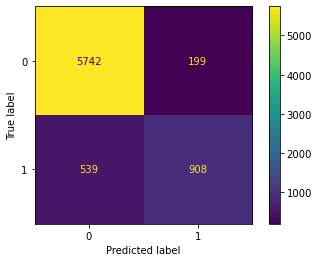

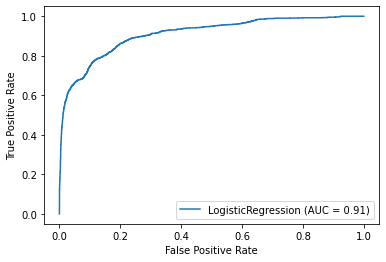

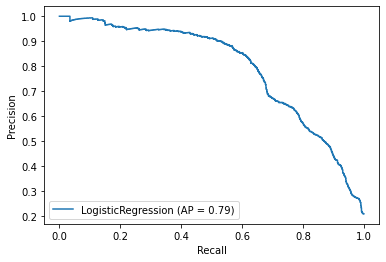

In [14]:
print('Logistic Regression:')
print('-' * 100)
print('Train f1_score: ', f1_score(y_train, y_train_pred_lr))
print('Validation f1_score: ', f1_score(y_val, y_val_pred_lr))
print('-' * 100)
print('Train precision: ', precision_score(y_train, y_train_pred_lr))
print('Validation precision: ', precision_score(y_val, y_val_pred_lr))
print('-' * 100)
print('Train recall: ', recall_score(y_train, y_train_pred_lr))
print('Validation recall: ', recall_score(y_val, y_val_pred_lr))
print('-' * 100)
plot_confusion_matrix(lr, X_val, y_val)
plot_roc_curve(lr, X_val, y_val)
plot_precision_recall_curve(lr, X_val, y_val)

In [15]:
dtc = DecisionTreeClassifier()
possible_parameter_values = {'criterion' : ['gini', 'entropy'],
                             'splitter' : ['best', 'random'],
                             'max_depth' : [int(x) for x in np.arange(start = 5, stop = 101, step = 5)],
                             'min_samples_split' : [int(x) for x in np.arange(start = 5, stop = 101, step = 1)],
                             'min_samples_leaf' : [int(x) for x in np.arange(start = 1, stop = 51, step = 1)]}
dtc_rscv = RandomizedSearchCV(estimator = dtc, param_distributions = possible_parameter_values, cv = 10, scoring = 'f1', verbose = 2, random_state = 17, n_jobs = 1)
dtc_rscv.fit(X_train, y_train)
dtc_rscv.best_params_

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV] splitter=random, min_samples_split=29, min_samples_leaf=38, max_depth=35, criterion=gini 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  splitter=random, min_samples_split=29, min_samples_leaf=38, max_depth=35, criterion=gini, total=   0.6s
[CV] splitter=random, min_samples_split=29, min_samples_leaf=38, max_depth=35, criterion=gini 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


[CV]  splitter=random, min_samples_split=29, min_samples_leaf=38, max_depth=35, criterion=gini, total=   0.6s
[CV] splitter=random, min_samples_split=29, min_samples_leaf=38, max_depth=35, criterion=gini 
[CV]  splitter=random, min_samples_split=29, min_samples_leaf=38, max_depth=35, criterion=gini, total=   0.6s
[CV] splitter=random, min_samples_split=29, min_samples_leaf=38, max_depth=35, criterion=gini 
[CV]  splitter=random, min_samples_split=29, min_samples_leaf=38, max_depth=35, criterion=gini, total=   0.7s
[CV] splitter=random, min_samples_split=29, min_samples_leaf=38, max_depth=35, criterion=gini 
[CV]  splitter=random, min_samples_split=29, min_samples_leaf=38, max_depth=35, criterion=gini, total=   0.6s
[CV] splitter=random, min_samples_split=29, min_samples_leaf=38, max_depth=35, criterion=gini 
[CV]  splitter=random, min_samples_split=29, min_samples_leaf=38, max_depth=35, criterion=gini, total=   0.6s
[CV] splitter=random, min_samples_split=29, min_samples_leaf=38, max_d

[CV]  splitter=random, min_samples_split=59, min_samples_leaf=12, max_depth=35, criterion=entropy, total=   0.4s
[CV] splitter=random, min_samples_split=59, min_samples_leaf=12, max_depth=35, criterion=entropy 
[CV]  splitter=random, min_samples_split=59, min_samples_leaf=12, max_depth=35, criterion=entropy, total=   0.3s
[CV] splitter=random, min_samples_split=59, min_samples_leaf=12, max_depth=35, criterion=entropy 
[CV]  splitter=random, min_samples_split=59, min_samples_leaf=12, max_depth=35, criterion=entropy, total=   0.2s
[CV] splitter=random, min_samples_split=59, min_samples_leaf=12, max_depth=35, criterion=entropy 
[CV]  splitter=random, min_samples_split=59, min_samples_leaf=12, max_depth=35, criterion=entropy, total=   0.3s
[CV] splitter=random, min_samples_split=59, min_samples_leaf=12, max_depth=35, criterion=entropy 
[CV]  splitter=random, min_samples_split=59, min_samples_leaf=12, max_depth=35, criterion=entropy, total=   0.3s
[CV] splitter=random, min_samples_split=59,

[CV]  splitter=best, min_samples_split=79, min_samples_leaf=10, max_depth=60, criterion=entropy, total=   4.5s
[CV] splitter=best, min_samples_split=79, min_samples_leaf=10, max_depth=60, criterion=entropy 
[CV]  splitter=best, min_samples_split=79, min_samples_leaf=10, max_depth=60, criterion=entropy, total=   4.3s
[CV] splitter=best, min_samples_split=79, min_samples_leaf=10, max_depth=60, criterion=entropy 
[CV]  splitter=best, min_samples_split=79, min_samples_leaf=10, max_depth=60, criterion=entropy, total=   4.4s
[CV] splitter=best, min_samples_split=79, min_samples_leaf=10, max_depth=60, criterion=entropy 
[CV]  splitter=best, min_samples_split=79, min_samples_leaf=10, max_depth=60, criterion=entropy, total=   4.1s
[CV] splitter=best, min_samples_split=79, min_samples_leaf=10, max_depth=60, criterion=entropy 
[CV]  splitter=best, min_samples_split=79, min_samples_leaf=10, max_depth=60, criterion=entropy, total=   4.2s
[CV] splitter=best, min_samples_split=79, min_samples_leaf=10

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  3.4min finished


{'splitter': 'best',
 'min_samples_split': 39,
 'min_samples_leaf': 19,
 'max_depth': 90,
 'criterion': 'entropy'}

Decision Tree Classifier:
----------------------------------------------------------------------------------------------------
Train f1_score:  0.9580413530582231
Validation f1_score:  0.9350828729281768
----------------------------------------------------------------------------------------------------
Train precision:  0.9592862092862093
Validation precision:  0.9344375431331953
----------------------------------------------------------------------------------------------------
Train recall:  0.9567997235182305
Validation recall:  0.9357290946786455
----------------------------------------------------------------------------------------------------


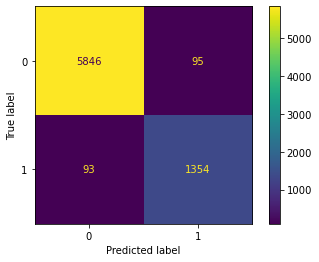

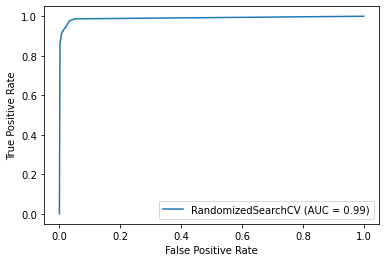

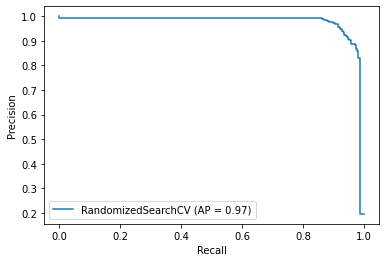

In [17]:
y_train_pred_dtc = dtc_rscv.predict(X_train)
y_val_pred_dtc = dtc_rscv.predict(X_val)
print('Decision Tree Classifier:')
print('-' * 100)
print('Train f1_score: ', f1_score(y_train, y_train_pred_dtc))
print('Validation f1_score: ', f1_score(y_val, y_val_pred_dtc))
print('-' * 100)
print('Train precision: ', precision_score(y_train, y_train_pred_dtc))
print('Validation precision: ', precision_score(y_val, y_val_pred_dtc))
print('-' * 100)
print('Train recall: ', recall_score(y_train, y_train_pred_dtc))
print('Validation recall: ', recall_score(y_val, y_val_pred_dtc))
print('-' * 100)
plot_confusion_matrix(dtc_rscv, X_val, y_val)
plot_roc_curve(dtc_rscv, X_val, y_val)
plot_precision_recall_curve(dtc_rscv, X_val, y_val)

In [19]:
xgbc = XGBClassifier()
possible_parameter_values = {'n_estimators' : [int(x) for x in np.arange(start = 50, stop = 1001, step = 50)], 
                             'use_label_encoder' : [True, False], 
                             'max_depth' : [int(x) for x in np.arange(start = 5, stop = 101, step = 5)], 
                             'learning_rate' : [float(x)/1000 for x in np.arange(start = 1, stop = 1001, step = 1)]}
xgbc_rscv = RandomizedSearchCV(estimator = xgbc, param_distributions = possible_parameter_values, cv = 10, scoring = 'f1', verbose = 2, random_state = 17, n_jobs = 1)
xgbc_rscv.fit(X_train, y_train)
xgbc_rscv.best_params_

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV] use_label_encoder=False, n_estimators=50, max_depth=35, learning_rate=0.737 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[21:49:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  use_label_encoder=False, n_estimators=50, max_depth=35, learning_rate=0.737, total=   6.0s
[CV] use_label_encoder=False, n_estimators=50, max_depth=35, learning_rate=0.737 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.9s remaining:    0.0s


[21:49:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  use_label_encoder=False, n_estimators=50, max_depth=35, learning_rate=0.737, total=   4.0s
[CV] use_label_encoder=False, n_estimators=50, max_depth=35, learning_rate=0.737 
[21:49:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  use_label_encoder=False, n_estimators=50, max_depth=35, learning_rate=0.737, total=   4.3s
[CV] use_label_encoder=False, n_estimators=50, max_depth=35, learning_rate=0.737 
[21:49:26] WARNING: C:

[21:52:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  use_label_encoder=False, n_estimators=600, max_depth=40, learning_rate=0.372, total=  18.8s
[CV] use_label_encoder=False, n_estimators=600, max_depth=40, learning_rate=0.372 
[21:52:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  use_label_encoder=False, n_estimators=600, max_depth=40, learning_rate=0.372, total=  18.9s
[CV] use_label_encoder=True, n_estimators=200, max_depth=95, learning_rate=0.615 
[21:53:15] WARNING:

[21:55:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  use_label_encoder=True, n_estimators=50, max_depth=15, learning_rate=0.158, total=   8.3s
[CV] use_label_encoder=True, n_estimators=50, max_depth=15, learning_rate=0.158 
[21:55:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  use_label_encoder=True, n_estimators=50, max_depth=15, learning_rate=0.158, total=   8.2s
[CV] use_label_encoder=True, n_estimators=50, max_depth=15, learning_rate=0.158 
[21:55:39] WARNING: C:/Use

[21:58:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  use_label_encoder=True, n_estimators=400, max_depth=50, learning_rate=0.646, total=  11.4s
[CV] use_label_encoder=True, n_estimators=400, max_depth=50, learning_rate=0.646 
[21:58:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  use_label_encoder=True, n_estimators=400, max_depth=50, learning_rate=0.646, total=  12.8s
[CV] use_label_encoder=True, n_estimators=400, max_depth=50, learning_rate=0.646 
[21:59:02] WARNING: C:

[22:03:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  use_label_encoder=False, n_estimators=400, max_depth=75, learning_rate=0.36, total=  17.7s
[CV] use_label_encoder=True, n_estimators=150, max_depth=45, learning_rate=0.449 
[22:03:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  use_label_encoder=True, n_estimators=150, max_depth=45, learning_rate=0.449, total=  10.0s
[CV] use_label_encoder=True, n_estimators=150, max_depth=45, learning_rate=0.449 
[22:03:32] WARNING: C:

[22:07:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  use_label_encoder=True, n_estimators=950, max_depth=35, learning_rate=0.375, total=  25.4s
[CV] use_label_encoder=True, n_estimators=950, max_depth=35, learning_rate=0.375 
[22:08:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  use_label_encoder=True, n_estimators=950, max_depth=35, learning_rate=0.375, total=  25.1s
[CV] use_label_encoder=True, n_estimators=950, max_depth=35, learning_rate=0.375 
[22:08:27] WARNING: C:

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed: 27.9min finished


[22:17:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


{'use_label_encoder': False,
 'n_estimators': 400,
 'max_depth': 75,
 'learning_rate': 0.36}

XGBoost Classifier:
----------------------------------------------------------------------------------------------------
Train f1_score:  1.0
Validation f1_score:  1.0
----------------------------------------------------------------------------------------------------
Train precision:  1.0
Validation precision:  1.0
----------------------------------------------------------------------------------------------------
Train recall:  1.0
Validation recall:  1.0
----------------------------------------------------------------------------------------------------


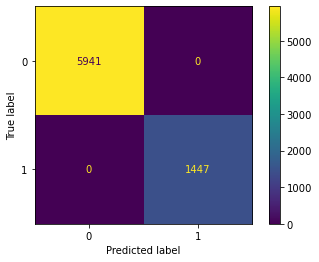

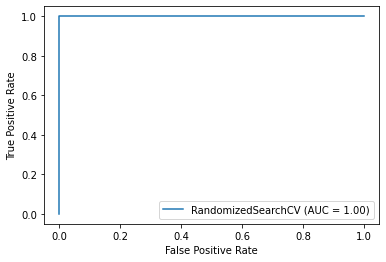

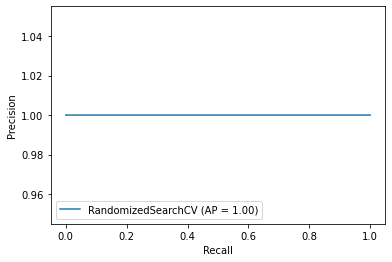

In [20]:
y_train_pred_xgbc = xgbc_rscv.predict(X_train)
y_val_pred_xgbc = xgbc_rscv.predict(X_val)
print('XGBoost Classifier:')
print('-' * 100)
print('Train f1_score: ', f1_score(y_train, y_train_pred_xgbc))
print('Validation f1_score: ', f1_score(y_val, y_val_pred_xgbc))
print('-' * 100)
print('Train precision: ', precision_score(y_train, y_train_pred_xgbc))
print('Validation precision: ', precision_score(y_val, y_val_pred_xgbc))
print('-' * 100)
print('Train recall: ', recall_score(y_train, y_train_pred_xgbc))
print('Validation recall: ', recall_score(y_val, y_val_pred_xgbc))
print('-' * 100)
plot_confusion_matrix(xgbc_rscv, X_val, y_val)
plot_roc_curve(xgbc_rscv, X_val, y_val)
plot_precision_recall_curve(xgbc_rscv, X_val, y_val)

In [21]:
knc = KNeighborsClassifier()
possible_parameter_values = {'n_neighbors' : [int(x) for x in np.arange(start = 1, stop = 101, step = 1)],
                             'weights' : ['uniform', 'distance']}
knc_rscv = RandomizedSearchCV(estimator = knc, param_distributions = possible_parameter_values, cv = 10, scoring = 'f1', verbose = 2, random_state = 17, n_jobs = 1)
knc_rscv.fit(X_train, y_train)
knc_rscv.best_params_

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV] weights=uniform, n_neighbors=1 ..................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ................... weights=uniform, n_neighbors=1, total=   1.7s
[CV] weights=uniform, n_neighbors=1 ..................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.6s remaining:    0.0s


[CV] ................... weights=uniform, n_neighbors=1, total=   1.6s
[CV] weights=uniform, n_neighbors=1 ..................................
[CV] ................... weights=uniform, n_neighbors=1, total=   1.6s
[CV] weights=uniform, n_neighbors=1 ..................................
[CV] ................... weights=uniform, n_neighbors=1, total=   1.8s
[CV] weights=uniform, n_neighbors=1 ..................................
[CV] ................... weights=uniform, n_neighbors=1, total=   1.5s
[CV] weights=uniform, n_neighbors=1 ..................................
[CV] ................... weights=uniform, n_neighbors=1, total=   1.5s
[CV] weights=uniform, n_neighbors=1 ..................................
[CV] ................... weights=uniform, n_neighbors=1, total=   1.7s
[CV] weights=uniform, n_neighbors=1 ..................................
[CV] ................... weights=uniform, n_neighbors=1, total=   1.6s
[CV] weights=uniform, n_neighbors=1 ..................................
[CV] .

[CV] .................. weights=uniform, n_neighbors=42, total=  16.5s
[CV] weights=distance, n_neighbors=38 ................................
[CV] ................. weights=distance, n_neighbors=38, total=  15.3s
[CV] weights=distance, n_neighbors=38 ................................
[CV] ................. weights=distance, n_neighbors=38, total=  14.4s
[CV] weights=distance, n_neighbors=38 ................................
[CV] ................. weights=distance, n_neighbors=38, total=  15.0s
[CV] weights=distance, n_neighbors=38 ................................
[CV] ................. weights=distance, n_neighbors=38, total=  14.5s
[CV] weights=distance, n_neighbors=38 ................................
[CV] ................. weights=distance, n_neighbors=38, total=  14.6s
[CV] weights=distance, n_neighbors=38 ................................
[CV] ................. weights=distance, n_neighbors=38, total=  14.6s
[CV] weights=distance, n_neighbors=38 ................................
[CV] .

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed: 26.0min finished


{'weights': 'uniform', 'n_neighbors': 1}

K Neighbors Classifier:
----------------------------------------------------------------------------------------------------
Train f1_score:  1.0
Validation f1_score:  1.0
----------------------------------------------------------------------------------------------------
Train precision:  1.0
Validation precision:  1.0
----------------------------------------------------------------------------------------------------
Train recall:  1.0
Validation recall:  1.0
----------------------------------------------------------------------------------------------------


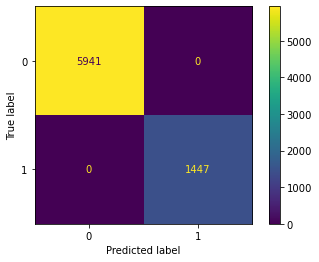

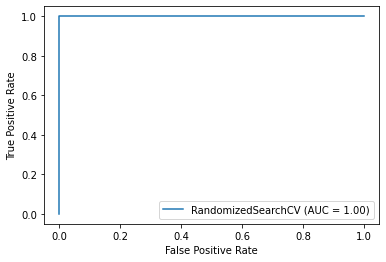

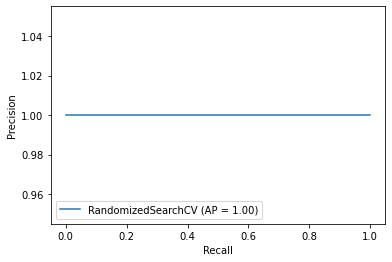

In [22]:
y_train_pred_knc = knc_rscv.predict(X_train)
y_val_pred_knc = knc_rscv.predict(X_val)
print('K Neighbors Classifier:')
print('-' * 100)
print('Train f1_score: ', f1_score(y_train, y_train_pred_knc))
print('Validation f1_score: ', f1_score(y_val, y_val_pred_knc))
print('-' * 100)
print('Train precision: ', precision_score(y_train, y_train_pred_knc))
print('Validation precision: ', precision_score(y_val, y_val_pred_knc))
print('-' * 100)
print('Train recall: ', recall_score(y_train, y_train_pred_knc))
print('Validation recall: ', recall_score(y_val, y_val_pred_knc))
print('-' * 100)
plot_confusion_matrix(knc_rscv, X_val, y_val)
plot_roc_curve(knc_rscv, X_val, y_val)
plot_precision_recall_curve(knc_rscv, X_val, y_val)

In [13]:
print('Logistic Regression Cross Validation:\n')
f1_train = []
f1_val = []
precision_train = []
precision_val = []
recall_train = []
recall_val = []
random_state = []
X = X_pca_train
y = df_train['TARGET']
for i in range(0,10):
    rs = random.randint(0, 100)
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state = rs)
    test_model_lr = LogisticRegression()
    test_model_lr.fit(X_train, y_train)
    y_train_pred_tlr = test_model_lr.predict(X_train)
    y_val_pred_tlr = test_model_lr.predict(X_val)
    random_state.append(rs)
    f1_train.append(f1_score(y_train, y_train_pred_tlr))
    f1_val.append(f1_score(y_val, y_val_pred_tlr))
    precision_train.append(precision_score(y_train, y_train_pred_tlr))
    precision_val.append(precision_score(y_val, y_val_pred_tlr))
    recall_train.append(recall_score(y_train, y_train_pred_tlr))
    recall_val.append(recall_score(y_val, y_val_pred_tlr))
data = {'Random State' : random_state, 'Train f1' : f1_train, 'Validation f1' : f1_val, 'Train Precision' : precision_train, 'Validation Precision' : precision_val, 
        'Train Recall' : recall_train, 'Validation Recall' : recall_val}
data = pd.DataFrame(data)
data['Difference(f1)'] = ((np.abs(data['Train f1'] - data['Validation f1'])) * 100)/(data['Train f1'])
data['Difference(Precision)'] = ((np.abs(data['Train Precision'] - data['Validation Precision'])) * 100)/(data['Train Precision'])
data['Difference(Recall)'] = ((np.abs(data['Train Recall'] - data['Validation Recall'])) * 100)/(data['Train Recall'])
print('Mean Difference(f1): ', data['Difference(f1)'].mean())
print('Mean Difference(Precision): ', data['Difference(Precision)'].mean())
print('Mean Difference(Recall): ', data['Difference(Recall)'].mean())
data

Logistic Regression Cross Validation:

Mean Difference(f1):  1.0921135436437304
Mean Difference(Precision):  1.8669771275997895
Mean Difference(Recall):  1.4650184341636492


,Random State,Train f1,Validation f1,Train Precision,Validation Precision,Train Recall,Validation Recall,Difference(f1),Difference(Precision),Difference(Recall)
0,91,0.702955,0.711708,0.801418,0.808195,0.626039,0.635802,1.245223,0.845607,1.559598
1,58,0.706761,0.709275,0.805617,0.813226,0.629514,0.628887,0.355715,0.944507,0.099613
2,21,0.706558,0.705053,0.798356,0.788091,0.633694,0.637845,0.213044,1.285720,0.655131
3,86,0.704923,0.692634,0.804878,0.782230,0.627051,0.621453,1.743282,2.813853,0.892753
4,23,0.701834,0.694305,0.806990,0.806481,0.620923,0.609524,1.072759,0.063099,1.835841
5,93,0.701614,0.706337,0.801199,0.805996,0.624048,0.628611,0.673086,0.598728,0.731079
6,71,0.701544,0.689844,0.800441,0.770506,0.624399,0.624470,1.667842,3.739743,0.011365
7,8,0.707196,0.698946,0.803221,0.820348,0.631679,0.608844,1.166656,2.132350,3.615102
8,29,0.705860,0.687126,0.802183,0.780090,0.630189,0.613960,2.653984,2.754097,2.575191
9,85,0.704871,0.703957,0.802067,0.774059,0.628685,0.645499,0.129545,3.492066,2.674511


In [13]:
print('Decision Tree Classifier Cross Validation:\n')
f1_train = []
f1_val = []
precision_train = []
precision_val = []
recall_train = []
recall_val = []
random_state = []
X = X_pca_train
y = df_train['TARGET']
for i in range(0,10):
    rs = random.randint(0, 100)
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state = rs)
    test_model_dtc = DecisionTreeClassifier(splitter = 'best', min_samples_split = 39, min_samples_leaf = 19, max_depth = 90, criterion = 'entropy')
    test_model_dtc.fit(X_train, y_train)
    y_train_pred_tdtc = test_model_dtc.predict(X_train)
    y_val_pred_tdtc = test_model_dtc.predict(X_val)
    random_state.append(rs)
    f1_train.append(f1_score(y_train, y_train_pred_tdtc))
    f1_val.append(f1_score(y_val, y_val_pred_tdtc))
    precision_train.append(precision_score(y_train, y_train_pred_tdtc))
    precision_val.append(precision_score(y_val, y_val_pred_tdtc))
    recall_train.append(recall_score(y_train, y_train_pred_tdtc))
    recall_val.append(recall_score(y_val, y_val_pred_tdtc))
data = {'Random State' : random_state, 'Train f1' : f1_train, 'Validation f1' : f1_val, 'Train Precision' : precision_train, 'Validation Precision' : precision_val, 
        'Train Recall' : recall_train, 'Validation Recall' : recall_val}
data = pd.DataFrame(data)
data['Difference(f1)'] = ((np.abs(data['Train f1'] - data['Validation f1'])) * 100)/(data['Train f1'])
data['Difference(Precision)'] = ((np.abs(data['Train Precision'] - data['Validation Precision'])) * 100)/(data['Train Precision'])
data['Difference(Recall)'] = ((np.abs(data['Train Recall'] - data['Validation Recall'])) * 100)/(data['Train Recall'])
print('Mean Difference(f1): ', data['Difference(f1)'].mean())
print('Mean Difference(Precision): ', data['Difference(Precision)'].mean())
print('Mean Difference(Recall): ', data['Difference(Recall)'].mean())
data

Decision Tree Classifier Cross Validation:

Mean Difference(f1):  2.120402244463206
Mean Difference(Precision):  1.843422413393124
Mean Difference(Recall):  2.389558926085484


,Random State,Train f1,Validation f1,Train Precision,Validation Precision,Train Recall,Validation Recall,Difference(f1),Difference(Precision),Difference(Recall)
0,82,0.965744,0.945270,0.962414,0.941454,0.969097,0.949118,2.119990,2.177881,2.061628
1,72,0.964838,0.948727,0.971130,0.958696,0.958627,0.938964,1.669801,1.280444,2.051143
2,91,0.966136,0.947368,0.971634,0.956643,0.960699,0.938272,1.942503,1.542797,2.334533
3,72,0.964838,0.947293,0.971130,0.957246,0.958627,0.937544,1.818448,1.429680,2.199214
4,28,0.965114,0.953642,0.962468,0.951321,0.967775,0.955975,1.188657,1.158126,1.219337
5,70,0.966186,0.944557,0.970000,0.950987,0.962402,0.938214,2.238593,1.960096,2.513349
6,29,0.967299,0.940202,0.968047,0.951166,0.966552,0.929487,2.801328,1.743774,3.834778
7,24,0.966381,0.950161,0.972517,0.962237,0.960323,0.938385,1.678439,1.057073,2.284403
8,35,0.967230,0.937155,0.970543,0.933382,0.963939,0.940959,3.109338,3.828864,2.383971
9,49,0.967280,0.941774,0.970074,0.948194,0.964503,0.935440,2.636927,2.255490,3.013234


In [15]:
print('XGBoost Classifier Cross Validation:\n')
f1_train = []
f1_val = []
precision_train = []
precision_val = []
recall_train = []
recall_val = []
random_state = []
X = X_pca_train
y = df_train['TARGET']
for i in range(0,10):
    rs = random.randint(0, 100)
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state = rs)
    test_model_xgbc = XGBClassifier(use_label_encoder = False, n_estimators = 400, max_depth = 75, learning_rate = 0.36)
    test_model_xgbc.fit(X_train, y_train)
    y_train_pred_txgbc = test_model_xgbc.predict(X_train)
    y_val_pred_txgbc = test_model_xgbc.predict(X_val)
    random_state.append(rs)
    f1_train.append(f1_score(y_train, y_train_pred_txgbc))
    f1_val.append(f1_score(y_val, y_val_pred_txgbc))
    precision_train.append(precision_score(y_train, y_train_pred_txgbc))
    precision_val.append(precision_score(y_val, y_val_pred_txgbc))
    recall_train.append(recall_score(y_train, y_train_pred_txgbc))
    recall_val.append(recall_score(y_val, y_val_pred_txgbc))
data = {'Random State' : random_state, 'Train f1' : f1_train, 'Validation f1' : f1_val, 'Train Precision' : precision_train, 'Validation Precision' : precision_val, 
        'Train Recall' : recall_train, 'Validation Recall' : recall_val}
data = pd.DataFrame(data)
data['Difference(f1)'] = ((np.abs(data['Train f1'] - data['Validation f1'])) * 100)/(data['Train f1'])
data['Difference(Precision)'] = ((np.abs(data['Train Precision'] - data['Validation Precision'])) * 100)/(data['Train Precision'])
data['Difference(Recall)'] = ((np.abs(data['Train Recall'] - data['Validation Recall'])) * 100)/(data['Train Recall'])
print('Mean Difference(f1): ', data['Difference(f1)'].mean())
print('Mean Difference(Precision): ', data['Difference(Precision)'].mean())
print('Mean Difference(Recall): ', data['Difference(Recall)'].mean())
data

XGBoost Classifier Cross Validation:

[09:56:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[09:56:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[09:57:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[09:57:47] WARNING: C:/Users/Adm

,Random State,Train f1,Validation f1,Train Precision,Validation Precision,Train Recall,Validation Recall,Difference(f1),Difference(Precision),Difference(Recall)
0,70,1.0,0.998992,1.0,1.0,1.0,0.997985,0.100840,0.0,0.201478
1,44,1.0,0.998305,1.0,1.0,1.0,0.996615,0.169549,0.0,0.338524
2,25,1.0,0.998946,1.0,1.0,1.0,0.997893,0.105448,0.0,0.210674
3,18,1.0,0.999004,1.0,1.0,1.0,0.998009,0.099635,0.0,0.199071
4,64,1.0,0.997015,1.0,1.0,1.0,0.994048,0.298507,0.0,0.595238
5,95,1.0,0.999654,1.0,1.0,1.0,0.999309,0.034566,0.0,0.069109
6,66,1.0,0.999645,1.0,1.0,1.0,0.999290,0.035524,0.0,0.071023
7,83,1.0,0.999645,1.0,1.0,1.0,0.999289,0.035549,0.0,0.071073
8,62,1.0,0.999653,1.0,1.0,1.0,0.999306,0.034710,0.0,0.069396
9,74,1.0,0.999645,1.0,1.0,1.0,0.999290,0.035499,0.0,0.070972


In [16]:
print('K Neighbors Classifier Cross Validation:\n')
f1_train = []
f1_val = []
precision_train = []
precision_val = []
recall_train = []
recall_val = []
random_state = []
X = X_pca_train
y = df_train['TARGET']
for i in range(0,10):
    rs = random.randint(0, 100)
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state = rs)
    test_model_knc = KNeighborsClassifier(weights = 'uniform', n_neighbors = 1)
    test_model_knc.fit(X_train, y_train)
    y_train_pred_tknc = test_model_knc.predict(X_train)
    y_val_pred_tknc = test_model_knc.predict(X_val)
    random_state.append(rs)
    f1_train.append(f1_score(y_train, y_train_pred_tknc))
    f1_val.append(f1_score(y_val, y_val_pred_tknc))
    precision_train.append(precision_score(y_train, y_train_pred_tknc))
    precision_val.append(precision_score(y_val, y_val_pred_tknc))
    recall_train.append(recall_score(y_train, y_train_pred_tknc))
    recall_val.append(recall_score(y_val, y_val_pred_tknc))
data = {'Random State' : random_state, 'Train f1' : f1_train, 'Validation f1' : f1_val, 'Train Precision' : precision_train, 'Validation Precision' : precision_val, 
        'Train Recall' : recall_train, 'Validation Recall' : recall_val}
data = pd.DataFrame(data)
data['Difference(f1)'] = ((np.abs(data['Train f1'] - data['Validation f1'])) * 100)/(data['Train f1'])
data['Difference(Precision)'] = ((np.abs(data['Train Precision'] - data['Validation Precision'])) * 100)/(data['Train Precision'])
data['Difference(Recall)'] = ((np.abs(data['Train Recall'] - data['Validation Recall'])) * 100)/(data['Train Recall'])
print('Mean Difference(f1): ', data['Difference(f1)'].mean())
print('Mean Difference(Precision): ', data['Difference(Precision)'].mean())
print('Mean Difference(Recall): ', data['Difference(Recall)'].mean())
data

K Neighbors Classifier Cross Validation:

Mean Difference(f1):  0.006877579092159358
Mean Difference(Precision):  0.013745704467353903
Mean Difference(Recall):  0.0


,Random State,Train f1,Validation f1,Train Precision,Validation Precision,Train Recall,Validation Recall,Difference(f1),Difference(Precision),Difference(Recall)
0,48,1.0,1.000000,1.0,1.000000,1.0,1.0,0.000000,0.000000,0.0
1,53,1.0,1.000000,1.0,1.000000,1.0,1.0,0.000000,0.000000,0.0
2,57,1.0,1.000000,1.0,1.000000,1.0,1.0,0.000000,0.000000,0.0
3,96,1.0,1.000000,1.0,1.000000,1.0,1.0,0.000000,0.000000,0.0
4,89,1.0,1.000000,1.0,1.000000,1.0,1.0,0.000000,0.000000,0.0
5,95,1.0,1.000000,1.0,1.000000,1.0,1.0,0.000000,0.000000,0.0
6,7,1.0,0.999312,1.0,0.998625,1.0,1.0,0.068776,0.137457,0.0
7,100,1.0,1.000000,1.0,1.000000,1.0,1.0,0.000000,0.000000,0.0
8,100,1.0,1.000000,1.0,1.000000,1.0,1.0,0.000000,0.000000,0.0
9,29,1.0,1.000000,1.0,1.000000,1.0,1.0,0.000000,0.000000,0.0


In [14]:
X_test = df_test.drop(['SK_ID_BUREAU', 'SK_ID_CURR', 'SK_ID_PREV', 'SK_ID_PREV_x', 'SK_ID_PREV_y'], axis = 1)
X_test = pd.DataFrame(ss.fit_transform(X_test), columns = X_test.columns)
pca_columns = []
for i in range(105):
    pca_columns.append('V' + str(i+1))
pca_model = PCA(n_components = 105)
pca_model.fit(X_test)
X_test = pd.DataFrame(pca_model.transform(X_test), columns = pca_columns)

In [ ]:
X_test.sha

In [15]:
X_test.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105
0,-0.309736,1.098091,0.212499,-2.307055,1.292084,3.248034,1.625085,-2.318531,-2.478371,0.052567,-0.307839,2.405226,-1.611114,-0.485426,0.697335,1.103263,2.001250,-0.020363,-0.429562,-0.669623,-1.149330,0.425798,-0.211462,0.492874,0.886972,0.153938,0.011596,-1.114830,-0.812087,-1.324159,-1.511666,0.625719,-2.369960,-0.793470,0.046597,-0.807250,-1.501051,0.625123,0.742380,0.676278,-0.379772,-2.030549,-0.781611,1.007446,1.662975,-0.820845,0.065447,0.101811,0.509462,-0.601523,0.329276,-0.586907,-0.570020,-0.167778,0.250596,0.479320,-1.062371,0.844231,-1.153834,-1.093341,-0.760878,1.176279,0.883340,-0.236999,0.483269,0.258898,0.056250,1.058930,0.362174,-0.736324,-0.110387,-0.461854,0.360754,-0.755579,0.084659,-0.437558,0.631563,-0.539130,0.422291,-0.230491,0.500877,-0.807720,0.669043,-0.266124,0.859756,0.423304,0.458324,1.226713,0.170606,-0.504516,-0.177172,0.608173,-0.151404,-0.437790,0.337474,-0.322074,-0.594579,0.150061,-0.042301,-0.003277,-0.186820,0.302029,-0.575301,-0.138790,-0.122947
1,-0.406003,1.085724,0.122771,-2.364937,1.291117,3.227451,1.612487,-2.333423,-2.418178,0.085953,-0.299942,2.314773,-1.627873,-0.486789,0.743106,1.190389,2.070684,-0.115777,-0.465818,-0.685507,-1.117050,0.457195,-0.339339,0.582444,0.807823,0.290291,-0.031848,-1.214914,-0.829623,-1.398434,-1.576246,0.649669,-2.326913,-0.762982,0.045238,-0.770469,-1.210549,0.434928,0.586225,0.612321,-0.287027,-2.005171,-0.861950,0.851311,1.783799,-0.840803,-0.081174,0.072445,0.223948,-0.819831,0.359842,-0.760526,-0.930849,-0.102379,0.109621,0.513816,-1.025187,1.072649,-1.165967,-0.858806,-0.765831,1.259225,1.034974,-0.445261,0.433747,0.000301,0.128818,1.241908,0.709057,-0.355695,-0.099648,-0.307570,0.342356,-0.892235,0.110881,-0.321822,0.705883,-0.385355,0.260554,-0.255799,0.490388,-1.006770,0.607189,-0.424643,0.983433,0.598025,0.575195,0.983507,0.228460,-0.406936,-0.118971,0.523246,-0.292484,-0.606462,0.394981,-0.172061,-0.609959,0.174161,-0.006885,0.050261,-0.203914,0.268740,-0.585587,-0.161961,-0.113412
2,-0.213469,1.110459,0.302228,-2.249174,1.293052,3.268616,1.637683,-2.303638,-2.538565,0.019180,-0.315736,2.495679,-1.594355,-0.484063,0.651564,1.016137,1.931816,0.075050,-0.393305,-0.653738,-1.181610,0.394402,-0.083585,0.403304,0.966122,0.017585,0.055041,-1.014746,-0.794550,-1.249884,-1.447086,0.601770,-2.413007,-0.823957,0.047955,-0.844032,-1.791553,0.815317,0.898534,0.740235,-0.472517,-2.055926,-0.701272,1.163581,1.542152,-0.800887,0.212067,0.131178,0.794976,-0.383215,0.298711,-0.413289,-0.209192,-0.233177,0.391572,0.444824,-1.099555,0.615814,-1.141701,-1.327877,-0.755924,1.093333,0.731705,-0.028738,0.532790,0.517496,-0.016319,0.875952,0.015291,-1.116953,-0.121125,-0.616138,0.379152,-0.618923,0.058437,-0.553294,0.557243,-0.692905,0.584028,-0.205183,0.511367,-0.608671,0.730897,-0.107605,0.736079,0.248584,0.341454,1.469920,0.112751,-0.602096,-0.235373,0.693100,-0.010325,-0.269118,0.279967,-0.472087,-0.579199,0.125961,-0.077717,-0.056815,-0.169725,0.335317,-0.565016,-0.115620,-0.132482
3,-0.324924,1.088839,0.189011,-2.326853,1.286663,3.220432,1.571581,-2.293139,-2.464630,0.081640,-0.309241,2.315670,-1.619322,-0.504379,0.747905,1.077704,2.094815,-0.115564,-0.430282,-0.673597,-1.117775,0.508447,-0.309360,0.453727,0.781791,0.197772,-0.010499,-1.191658,-0.813301,-1.404402,-1.660306,0.653365,-2.379969,-0.778727,0.036160,-0.698706,-1.233930,0.430344,0.773931,0.728248,-0.129788,-2.011926,-0.806608,1.025228,1.441425,-1.045055,0.021061,0.091525,0.382461,-0.841897,0.613579,-0.416570,-0.234999,-0.059580,0.312522,0.437875,-1.171828,0.509454,-1.411876,-0.820648,-0.7

In [16]:
test_model_dtc

DecisionTreeClassifier(criterion='entropy', max_depth=90, min_samples_leaf=19,
                       min_samples_split=39)

In [35]:
prediction = np.round(test_model_dtc.predict_proba(X_test)[:, 1], 1)
prediction

array([0., 0., 0., ..., 0., 0., 0.])

In [36]:
prediction = pd.DataFrame(prediction)

In [37]:
prediction[0].value_counts()

0.0    9514
1.0     894
0.9     285
0.6     282
0.5     276
0.1     271
0.2     240
0.3     182
0.8     125
0.7      97
0.4      90
Name: 0, dtype: int64

In [38]:
prediction.to_csv('Prediction.csv', index = None, header = None)

In [40]:
roc_auc_score(y_val, np.round(test_model_dtc.predict_proba(X_val)[:, 1], 1))

0.9874191817989428

In [23]:
prediction = pd.DataFrame(prediction)

In [43]:
prediction.head()

,0
0,0
1,0
2,0
3,0
4,0


In [25]:
prediction.value_counts()

0    10757
1     1499
dtype: int64

In [45]:
t_list = X_test.iloc[13]

In [46]:
test_model_dtc.predict([t_list])

array([1], dtype=int64)

In [44]:
prediction[prediction[0] == 1]

,0
13,1
15,1
16,1
31,1
33,1
34,1
49,1
51,1
52,1
67,1


In [47]:
file = open(r'D:\\DSProjects\\Credit Risk\\credit_risk.pkl', 'wb')
pickle.dump(test_model_dtc, file)
file.close()